In [1]:
# Library imports with explanations:
import requests        # HTTP library - sends requests to websites (like clicking a link)
from bs4 import BeautifulSoup  # HTML parser - reads and navigates HTML code from websites
import pandas as pd    # Data analysis library - creates tables/spreadsheets for our data
import time           # Built-in Python library - lets us add delays between requests
from typing import List, Dict  # Type hints - helps specify what data types functions expect


In [2]:
base_url = "http://ufcstats.com"

events_url = f"{base_url}/statistics/events/completed"

our_headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
}

response = requests.get(events_url,headers=our_headers)

In [3]:
soup = BeautifulSoup(response.content, "html.parser")

In [4]:
event_rows = soup.find_all('tr', class_='b-statistics__table-row')[1:]

print(event_rows)

[<tr class="b-statistics__table-row">
<td class="b-statistics__table-col_type_clear"></td>
</tr>, <tr class="b-statistics__table-row">
<td class="b-statistics__table-col">
<i class="b-statistics__table-content">
<a class="b-link b-link_style_black" href="http://ufcstats.com/event-details/6cd3dfc54f01287f">
                          UFC Fight Night: Dolidze vs. Hernandez
                        </a>
<span class="b-statistics__date">
                          August 09, 2025
                        </span>
</i>
</td>
<td class="b-statistics__table-col b-statistics__table-col_style_big-top-padding">
                    Las Vegas, Nevada, USA
                  </td>
</tr>, <tr class="b-statistics__table-row">
<td class="b-statistics__table-col">
<i class="b-statistics__table-content">
<a class="b-link b-link_style_black" href="http://ufcstats.com/event-details/f2c934689243fe4e">
                          UFC Fight Night: Taira vs. Park
                        </a>
<span class="b-statistics

In [5]:
def print_events (events: List[Dict]):
        print("\n" + "="*60)
        print("RECENT UFC EVENTS:")
        print("="*60)
        
        # Pretty print each event
        for i, event in enumerate(events, 1):
            print(f"\nEvent {i}:")
            print(f"  Name: {event['name']}")
            print(f"  Date: {event['date']}")
            print(f"  Location: {event['location']}")
            print(f"  URL: {event['url']}")

In [6]:
events = []

for row in event_rows:
    cells = row.find_all('td', class_='b-statistics__table-col')

    if len(cells) >= 2:
        # Get the event name and URL from the first cell
        name_date_cell = cells[0]
        event_link = name_date_cell.find('a')
        event_date_tag = name_date_cell.find('span')

        if event_link and event_date_tag:
            # Extract event information
            event_name = event_link.text.strip()
            event_url = event_link.get('href')
            
            # Get location from second cell
            event_location = cells[1].text.strip() 

            # 
            event_date = event_date_tag.text.strip()
            
            # Create a dictionary with all the event info
            event_data = {
                'name': event_name,
                'date': event_date,
                'location': event_location,
                'url': event_url
            }
            
            # Add this event to our events list
            events.append(event_data)

            # Print progress
            print(f"Found event #{len(events)}: {event_name} on {event_date}")
            
print_events(events)

Found event #1: UFC Fight Night: Dolidze vs. Hernandez on August 09, 2025
Found event #2: UFC Fight Night: Taira vs. Park on August 02, 2025
Found event #3: UFC Fight Night: Whittaker vs. De Ridder on July 26, 2025
Found event #4: UFC 318: Holloway vs. Poirier 3 on July 19, 2025
Found event #5: UFC Fight Night: Lewis vs. Teixeira on July 12, 2025
Found event #6: UFC 317: Topuria vs. Oliveira on June 28, 2025
Found event #7: UFC Fight Night: Hill vs. Rountree Jr. on June 21, 2025
Found event #8: UFC Fight Night: Usman vs. Buckley on June 14, 2025
Found event #9: UFC 316: Dvalishvili vs. O'Malley 2 on June 07, 2025
Found event #10: UFC Fight Night: Blanchfield vs. Barber on May 31, 2025
Found event #11: UFC Fight Night: Burns vs. Morales on May 17, 2025
Found event #12: UFC 315: Muhammad vs. Della Maddalena on May 10, 2025
Found event #13: UFC Fight Night: Sandhagen vs. Figueiredo on May 03, 2025
Found event #14: UFC Fight Night: Machado Garry vs. Prates on April 26, 2025
Found event #15

In [7]:
from pprint import pprint

fights = []

for event in events:
    pprint(event)
    print("\n")

{'date': 'August 09, 2025',
 'location': 'Las Vegas, Nevada, USA',
 'name': 'UFC Fight Night: Dolidze vs. Hernandez',
 'url': 'http://ufcstats.com/event-details/6cd3dfc54f01287f'}


{'date': 'August 02, 2025',
 'location': 'Las Vegas, Nevada, USA',
 'name': 'UFC Fight Night: Taira vs. Park',
 'url': 'http://ufcstats.com/event-details/f2c934689243fe4e'}


{'date': 'July 26, 2025',
 'location': 'Abu Dhabi, Abu Dhabi, United Arab Emirates',
 'name': 'UFC Fight Night: Whittaker vs. De Ridder',
 'url': 'http://ufcstats.com/event-details/28d8638ea0a71908'}


{'date': 'July 19, 2025',
 'location': 'New Orleans, Louisiana, USA',
 'name': 'UFC 318: Holloway vs. Poirier 3',
 'url': 'http://ufcstats.com/event-details/b8e2f10efb6eca85'}


{'date': 'July 12, 2025',
 'location': 'Nashville, Tennessee, USA',
 'name': 'UFC Fight Night: Lewis vs. Teixeira',
 'url': 'http://ufcstats.com/event-details/7b03d9df5910917d'}


{'date': 'June 28, 2025',
 'location': 'Las Vegas, Nevada, USA',
 'name': 'UFC 317:

In [8]:
import matplotlib.pyplot as plt


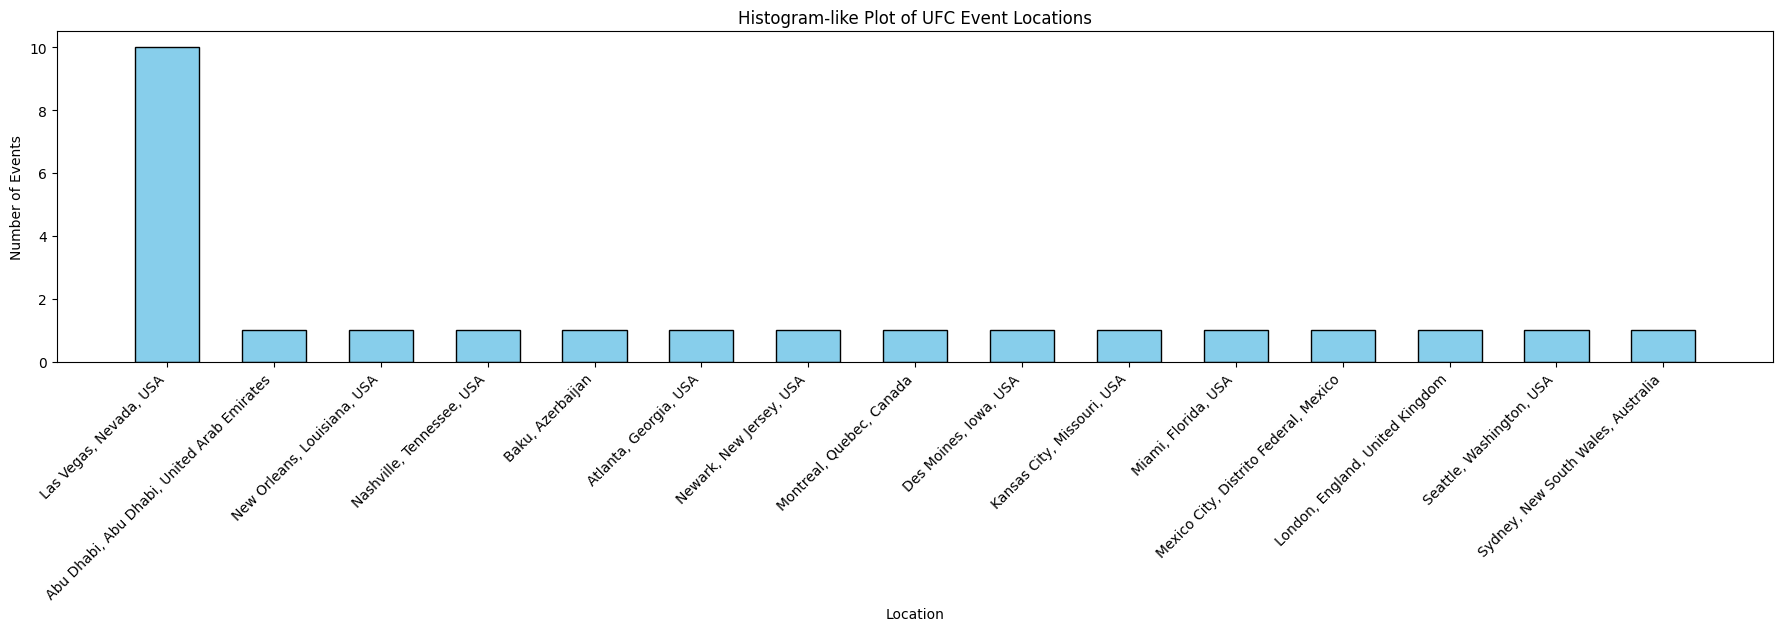

In [9]:
events_locations = []
event_urls = []

for event in events:
    event_urls.append(event["url"])
    events_locations.append(event["location"])

from collections import Counter

location_counts = Counter(events_locations)
locations = list(location_counts.keys())
counts = list(location_counts.values())

# Sort for better readability (optional)
locations, counts = zip(*sorted(zip(locations, counts), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(18, 6))
plt.bar(locations, counts, edgecolor='black', width=0.6, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Histogram-like Plot of UFC Event Locations")
plt.xlabel("Location")
plt.ylabel("Number of Events")
plt.show()


In [10]:
for i, url in enumerate(event_urls):
    response = requests.get(url,headers=our_headers)
    soup = BeautifulSoup(response.content, "html.parser")

    matchups = []

    matchup_tags = soup.find_all("td", {
        "class": "b-fight-details__table-col l-page_align_left",
        "style": "width:100px"
    })

    for matchup_tag in matchup_tags:
        fighters = matchup_tag.find_all("a", class_="b-link b-link_style_black")
        print(fighters)
        matchups.append(fighters[0].text.strip()+" vs "+ fighters[1].text.strip())
    
    events[i]["matchups"] = matchups

[<a class="b-link b-link_style_black" href="http://ufcstats.com/fighter-details/093e1f5bb73850be">
              Anthony Hernandez
            </a>, <a class="b-link b-link_style_black" href="http://ufcstats.com/fighter-details/327d5f279895110d">
              Roman Dolidze
            </a>]
[<a class="b-link b-link_style_black" href="http://ufcstats.com/fighter-details/32ab52e5de93092d">
              Steve Erceg
            </a>, <a class="b-link b-link_style_black" href="http://ufcstats.com/fighter-details/6d68c1afe954f121">
              Ode Osbourne
            </a>]
[<a class="b-link b-link_style_black" href="http://ufcstats.com/fighter-details/abcf2cc6efc42031">
              Iasmin Lucindo
            </a>, <a class="b-link b-link_style_black" href="http://ufcstats.com/fighter-details/f0feeb2192937424">
              Angela Hill
            </a>]
[<a class="b-link b-link_style_black" href="http://ufcstats.com/fighter-details/8fd808923cffff82">
              Andre Fili
         

In [11]:
for event in events:
    pprint(event)
    print("\n")

{'date': 'August 09, 2025',
 'location': 'Las Vegas, Nevada, USA',
 'matchups': ['Anthony Hernandez vs Roman Dolidze',
              'Steve Erceg vs Ode Osbourne',
              'Iasmin Lucindo vs Angela Hill',
              'Andre Fili vs Christian Rodriguez',
              'Jean Matsumoto vs Miles Johns',
              'Christian Leroy Duncan vs Eryk Anders',
              'Julius Walker vs Rafael Cerqueira',
              'Elijah Smith vs Toshiomi Kazama',
              'Joselyne Edwards vs Priscila Cachoeira',
              'Uros Medic vs Gilbert Urbina',
              'Gabriella Fernandes vs Julija Stoliarenko',
              'Eric McConico vs Cody Brundage'],
 'name': 'UFC Fight Night: Dolidze vs. Hernandez',
 'url': 'http://ufcstats.com/event-details/6cd3dfc54f01287f'}


{'date': 'August 02, 2025',
 'location': 'Las Vegas, Nevada, USA',
 'matchups': ['Tatsuro Taira vs HyunSung Park',
              'Chris Duncan vs Mateusz Rebecki',
              'Esteban Ribovics vs Elves Brener